In [1]:
import os
import pandas as pd
import numpy as np
import sys
import torch
import torch
import torch.nn as nn

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
os.getcwd()

'/home/alexg/ML_mutational_learning/notebooks'

In [5]:
os.chdir("..")

In [6]:
os.getcwd()

'/home/alexg/ML_mutational_learning'

In [7]:
sys.path.append('./scripts/')

In [8]:
from scripts.train import training

In [10]:
from scripts.models import CNNModel, RNN
from scripts.evaluate import plot_loss, evaluate_model
from scripts.data import get_desc

In [11]:
DIR_NAME = './data/ab/'

In [12]:
train_name = 'train.csv.gz'
test_name = 'test.csv.gz'

In [13]:
train_path = os.path.join(DIR_NAME, train_name)
test_path = os.path.join(DIR_NAME, test_name)


In [14]:
train_path

'./data/ab/train.csv.gz'

In [15]:
train = pd.read_csv(train_path,  compression='gzip')

In [17]:
test = pd.read_csv(test_path,  compression='gzip')

In [18]:
train.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNEGFNCYIPLVTYGFHTTTGVSY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
1,KNKGFNCYSPITEYGFFPTNGKNF,IGHV_RBD,2,IGHJ_RBD,0.000093,1,9,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
2,SKQGFNCYCPLIGYGFQRTFGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
3,KNRQFNCYWPLVRYGFWTTSGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,[[ 0.0000000e+00 0.0000000e+00 0.0000000e+00...
4,KNPGFNCYLPLGHYGFQPTNGRDF,IGHV_RBD,3,IGHJ_RBD,0.000140,1,7,LY16,[[ 0.00000000e+00 0.00000000e+00 0.00000000e...


In [19]:
train['repr'] = get_desc(train)

In [20]:
test['repr'] = get_desc(test)

In [21]:
test.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNTGFNCYFPLLAYGFHPTSGVDY,IGHV_RBD,1,IGHJ_RBD,0.000063,0,6,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,KNPGFNCYHPIVGYGFQPTIGHDF,IGHV_RBD,1,IGHJ_RBD,0.000047,1,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,TTAGFNCYMPITRYGFWPTDGRSW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,12,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,RNRGFNCYDPIHKYGFHRTNGLNY,IGHV_RBD,1,IGHJ_RBD,0.000047,1,10,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,KNKKFNCYVPLVTYGFHPTNGVNY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [22]:
train.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNEGFNCYIPLVTYGFHTTTGVSY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,KNKGFNCYSPITEYGFFPTNGKNF,IGHV_RBD,2,IGHJ_RBD,0.000093,1,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,SKQGFNCYCPLIGYGFQRTFGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,KNRQFNCYWPLVRYGFWTTSGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,KNPGFNCYLPLGHYGFQPTNGRDF,IGHV_RBD,3,IGHJ_RBD,0.000140,1,7,LY16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [23]:
def make_map():
    mapp_ = {}
    for i, ab in enumerate(train['Antibody'].unique()):
        mapp_[ab] = i
    return mapp_

In [24]:
mapp_ = make_map()

In [25]:
def func_(x):
    pos = mapp_[x['Antibody']]
    features = x['repr']
    ab_feature = np.zeros((24, 1))
    ab_feature[pos] = 1
    features = np.concatenate((ab_feature, features), axis=1)
    return features

In [26]:
train['repr'] = train.apply(func_, axis=1)

In [27]:
test['repr'] = test.apply(func_, axis=1)

Specify the target antibodies

In [28]:
target_ab = 'REGN33'

In [29]:
SEED = 42

In [30]:
def get_data(target_ab, train, test, samples = 200):
    target_df = train.loc[train['Antibody'] == target_ab]
    rest_df = train.loc[train['Antibody'] != target_ab]
    target_test = test.loc[test['Antibody'] == target_ab]
    
    sample_target = target_df.sample(n=samples, random_state=SEED)
    
    train_target = sample_target.iloc[:100, :]
    valid_target = sample_target.iloc[100:, :]
    
    return train_target, valid_target, target_test, rest_df

In [31]:
train_target, valid_target, target_test, rest_df = get_data(target_ab, train, test)

Первый вариант - сначала просто другие антитела в обучении. 

In [32]:
from torch.utils.data import Dataset, DataLoader

In [33]:
rest_df.head()

,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody,repr
0,KNEGFNCYIPLVTYGFHTTTGVSY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,KNKGFNCYSPITEYGFFPTNGKNF,IGHV_RBD,2,IGHJ_RBD,0.000093,1,9,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,SKQGFNCYCPLIGYGFQRTFGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,KNRQFNCYWPLVRYGFWTTSGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,KNPGFNCYLPLGHYGFQPTNGRDF,IGHV_RBD,3,IGHJ_RBD,0.000140,1,7,LY16,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [34]:
class Data(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        feature = self.df.repr.iloc[idx]
        label = self.df.Label.iloc[idx]
        return feature, label

In [35]:
def prepare_dataloader(df, batch_size= 5, shuffle=True, collate_fn = None):
    dataset = Data(df)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=2, collate_fn=collate_fn)
    return dataloader

Попробовать разные стратегии обучения

1) Подавать антитела равномерно на каждой эпохе 
2) Последовательно

In [36]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(SEED)

In [34]:
trainloader_1 = prepare_dataloader(rest_df, shuffle=True, batch_size=10)
validloader = prepare_dataloader(valid_target, shuffle=False, batch_size=2)
trainloader_2 = prepare_dataloader(train_target, shuffle=True, batch_size=1)
testloader = prepare_dataloader(target_test, shuffle=False, batch_size=1)

In [35]:
model = CNNModel(41, 100).to(device)

In [36]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 30

In [37]:
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_1, validloader)

100%|██████████| 30/30 [08:07<00:00, 16.25s/it]


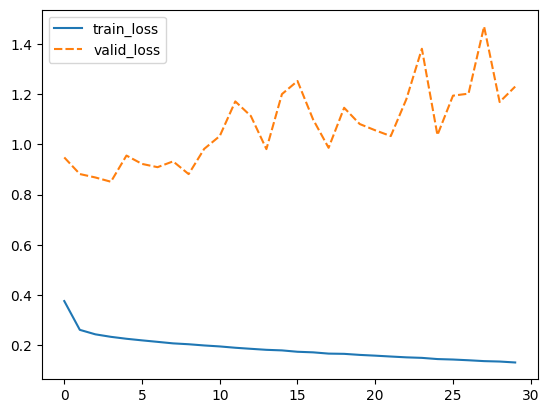

In [38]:
plot_loss(loss_train_hist, loss_valid_hist)

In [39]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.586808,0.345076,0.66686,0.454806,0.649757


##### Все другие антитела +  10000  таргентого антитела

In [ ]:
train_target.shape  # (25000 - объектов)

(25000, 9)

In [ ]:
s1 = train_target.iloc[:10000, :]

In [ ]:
add_train = pd.concat([s1, rest_df])

In [ ]:
trainloader = prepare_dataloader(add_train, shuffle=True)

In [ ]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader, validloader)

100%|██████████| 12/12 [08:54<00:00, 44.57s/it]


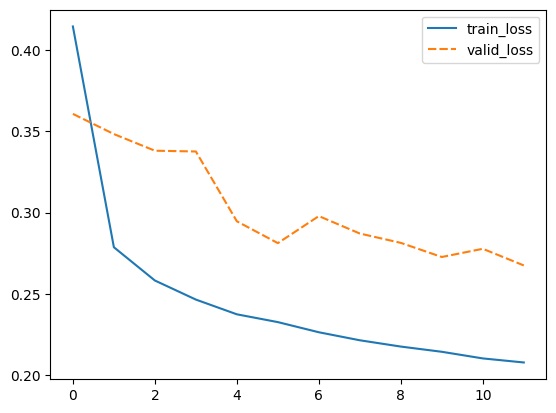

In [ ]:
plot_loss(loss_train_hist, loss_valid_hist)

In [ ]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.889197,0.867186,0.906882,0.88659,0.958959


In [ ]:
s2 = train_target.iloc[:17000, :]
add_train = pd.concat([s2, rest_df])
trainloader = prepare_dataloader(add_train, shuffle=True)

In [ ]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 12
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader, validloader)

100%|██████████| 12/12 [09:48<00:00, 49.04s/it]


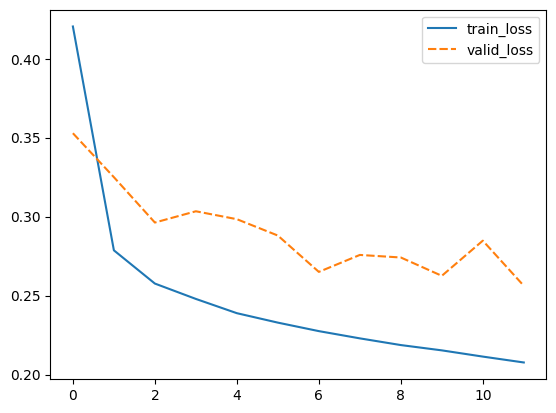

In [ ]:
plot_loss(loss_train_hist, loss_valid_hist)

In [ ]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.902748,0.899265,0.905373,0.902309,0.963091


### Обучение на  всех данных тарегетного антитела + всех антител.

In [ ]:
s3 = train_target.iloc[:, :]
add_train = pd.concat([s3, rest_df])
trainloader = prepare_dataloader(add_train, shuffle=True)

In [ ]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 30
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader, validloader)

100%|██████████| 30/30 [15:19<00:00, 30.64s/it]


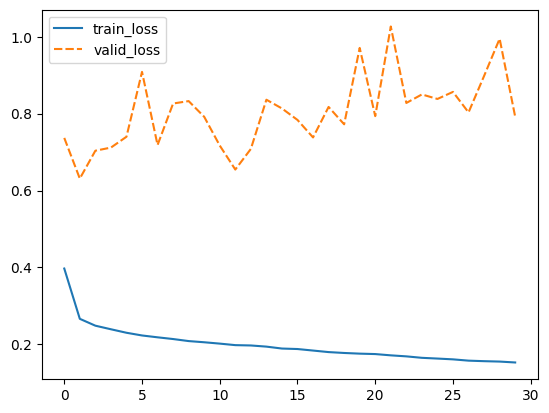

In [ ]:
plot_loss(loss_train_hist, loss_valid_hist)

In [ ]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.709291,0.635737,0.744819,0.685968,0.798624


Добавление новых данных таргета увлечили precision но упустили recall

### Обучение только на данных таргентого антитела.

In [ ]:
trainloader = prepare_dataloader(train_target, shuffle=True)

In [ ]:
model = CNNModel(41, 100).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 30
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader)

100%|██████████| 30/30 [00:10<00:00,  2.76it/s]


In [ ]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.69836,0.536052,0.792905,0.639657,0.810698


#### Можно попробовать разные варианты порядка подачи данных в сетку

##### 1. Сначала использовать данные других антител, потом добивать таргентым. 

####  И порядок: 
#### 1. Сначала миксованнные антитела + таргет 



In [ ]:
rest_df.shape

(72056, 9)

In [52]:
model = CNNModel(41, 150).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 30
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_1, validloader)

100%|██████████| 30/30 [08:23<00:00, 16.79s/it]


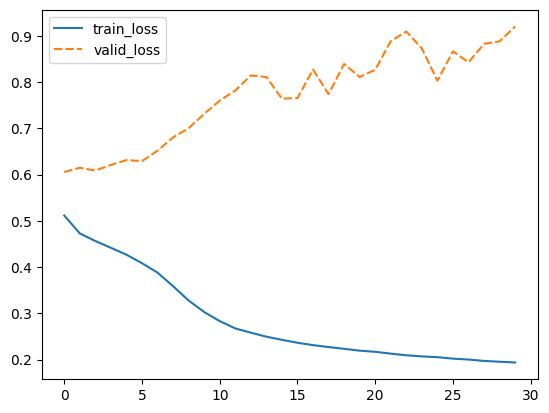

In [53]:
plot_loss(loss_train_hist, loss_valid_hist)

In [54]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.623418,0.334433,0.790854,0.47008,0.761062


In [55]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 30
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_2, validloader)

100%|██████████| 30/30 [00:31<00:00,  1.05s/it]


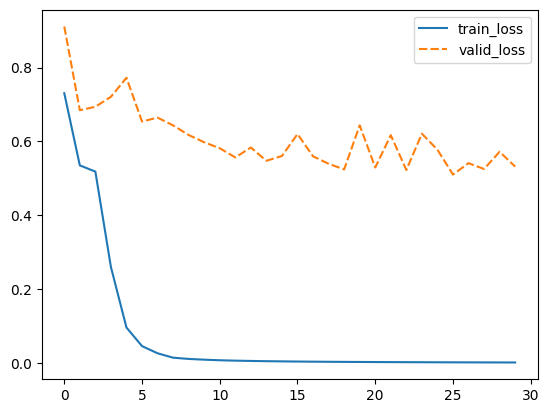

In [56]:
plot_loss(loss_train_hist, loss_valid_hist)

In [57]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.755783,0.627792,0.843165,0.719711,0.861951


In [58]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_2, validloader)

100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


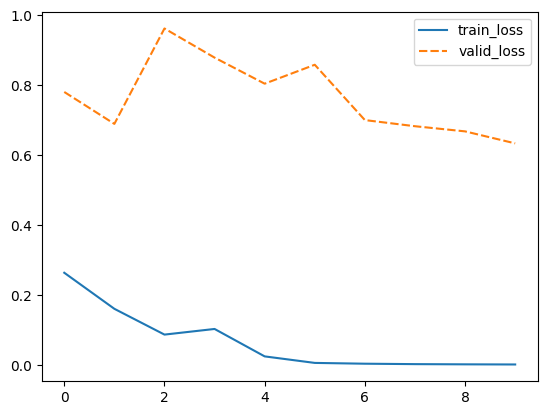

In [59]:
plot_loss(loss_train_hist, loss_valid_hist)

In [60]:
evaluate_model(testloader, model)

,accuracy,recall,precision,f1_scor,auc
0,0.745227,0.606356,0.838864,0.703907,0.849563


Learning  RNN model

### Обучение только на данных таргентого антитела.

In [37]:

trainloader_rest = prepare_dataloader(rest_df, shuffle=True, batch_size=10)
validloader = prepare_dataloader(valid_target, shuffle=False, batch_size=10)
trainloader_target = prepare_dataloader(train_target, shuffle=True, batch_size=5)
testloader = prepare_dataloader(target_test, shuffle=False, batch_size=50)

In [38]:
model = RNN(41, 24, 100, 5).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
num_epochs = 10
loss_train_hist, loss_valid_hist = training(model, criterion, optimizer, num_epochs, trainloader_target, validloader)

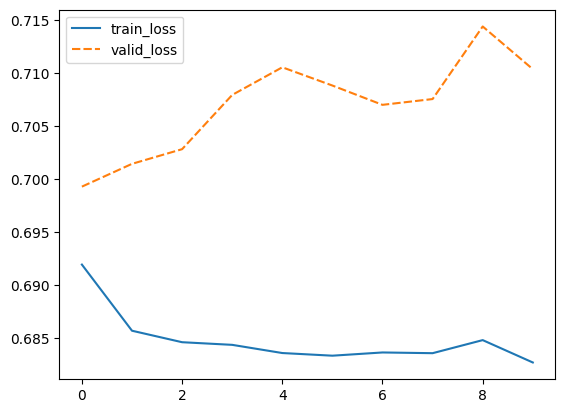

In [42]:
plot_loss(loss_train_hist, loss_valid_hist)

In [43]:
evaluate_model(testloader, model)

/home/alexg/ML_mutational_learning/mutations_leaning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,recall,precision,f1_scor,auc
0,0.500562,0.0,0.0,0.0,0.773274


: 